# Rank-Change Interval Test (RTR)

右→左（TR→TL）差分更新＋内側交点の収集をテストします。

In [1]:
using Pkg
Pkg.activate(".")
println("Julia version: ", VERSION)

  Activating project at `/workspaces/inulab_julia_devcontainer/src`


Julia version: 1.11.2


In [1]:
# 必要ファイルの取り込み（同ディレクトリにあると想定）
include("set_regret.jl")
include("RegretRTR.jl")
include("file_operate.jl")
include("plot_regret_transition_rtr.jl")
using .RegretRTR
using Plots

## テスト用データを準備

In [2]:
utility_v= read_utility_value("u1")
#ファイルからの読み取り
trueW= read_true_weights("A" )
methodW = read_method_weights("A/MMRW", 1,6);
println(methodW[1])
# A×N 効用値行列（例：A=5, N=6）
A, N = 5, 6

t_range =find_optimal_trange(methodW[1].L, methodW[1].R)
utility = Matrix(utility_v[5])
# 区間重要度（正規性を満たす適当な例）
L,R = methodW[1].L,methodW[1].R
tL, tR = t_range
println("t-range: [", tL, ", ", tR, "]\n",L,R)
println(typeof(utility))

(L = [0.150363, 0.150363, 0.073647, 0.075181, 0.050121, 0.037591], R = [0.338316, 0.338316, 0.196392, 0.207397, 0.165918, 0.216395], adjacent = 0.925469)
t-range: [0.7844484660502471, 1.378893823796674]
[0.150363, 0.150363, 0.073647, 0.075181, 0.050121, 0.037591][0.338316, 0.338316, 0.196392, 0.207397, 0.165918, 0.216395]
Matrix{Float64}


## プロット（推移）

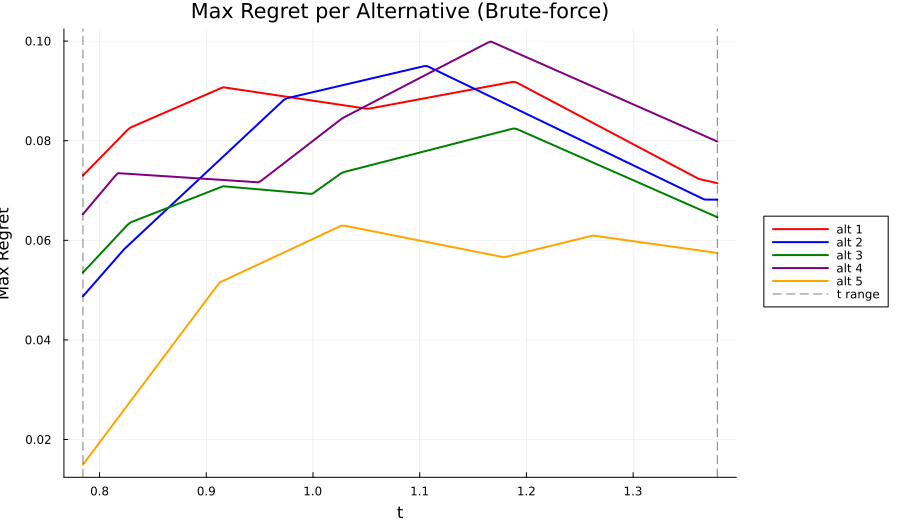

In [4]:
p= plot_regret_bruteforce(utility, L, R; n=200)
display(p)

## 逐次進行しながら、外側＆内側の変化点を収集

In [5]:
st2 = RegretRTR.build_state(utility, L, R)
RegretRTR.run!(st2)
println("Collected change points (|cps|=", length(RegretRTR.change_points(st2)), "): ")
println(RegretRTR.change_points(st2))
println("Final ranking: ", RegretRTR.current_ranking(st2))

Collected change points (|cps|=7): 
[1.378893823796674, 1.1061665466475963, 1.0376016460512512, 0.973929845885341, 0.9201087936637627, 0.862824680927433, 0.8279701566436739]
Final ranking: [5, 2, 3, 1, 4]


In [ ]:

Collected change points (|cps|=7): 
[1.378893823796674, 1.1061665466475963, 1.0376016460512512, 0.973929845885341, 0.9201087936637627, 0.862824680927433, 0.8279701566436739]
Final ranking: [5, 2, 3, 1, 4]4, 1.1061665466475963, 1.0376016460512512, 0.973929845885341, 0.9201087936637627, 0.862824680927433, 0.8279701566436739]

## CSV 保存

In [ ]:
csv_path = "rank_changes.csv"
RegretRTR.save_rank_changes_csv(st2, csv_path)
println("Saved: ", csv_path)